In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
sns.set()


# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

In [2]:
# directory
data_file_path = "/Users/gandalf/Documents/coding/do_not_commit/capstone/"
website_file_path = '/Users/gandalf/Documents/coding/rczyrnik.github.io/capstone/'

In [3]:
user_df = pd.read_json(data_file_path+'user_df.json')
n=len(user_df)
user_df.head(2)

,about,age,amenities,available,college,const,created_date,created_day,created_day_of_month,created_day_of_week,...,numRoommates,petsOk,rent_range,smokingOk,td_creat_avail,term,type,work,yes_block,yes_room
00DMWuKDFs,I'm really busy with work,21,[],NaN,None,1,1508025600000,736617,15,7,...,NaN,1,NaN,1,NaN,NaN,None,VIP Valet,0,1
00kOFrnYJu,,21,"[Dishwasher, Private Bath, Laundry, A/C, Furni...",2.020464e+12,DeVry University,1,1511481600000,736657,24,5,...,1.0,1,700.0,1,5891.0,8.0,None,None,0,0


### gender

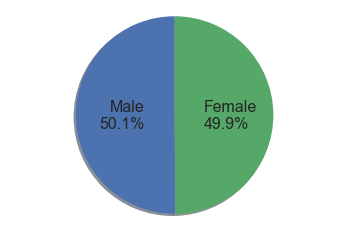

In [4]:
num_male = (user_df.gender==1).sum()
num_female = (user_df.gender==0).sum()

sizes = [num_male, num_female]
labels = 'Male\n50.1%', 'Female\n49.9%'

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, labeldistance=.3, textprops={'fontsize':16},
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig(website_file_path+"eda_gender_of_users.png")
plt.show()

### age

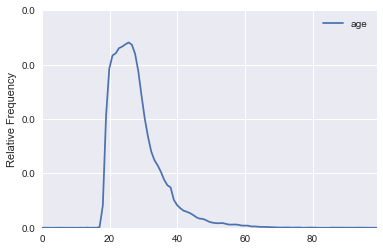

In [5]:
ax=sns.kdeplot(user_df.age, bw=.7)
y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks[::2])
ylabels = [round(x/n,3) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
ax.set_xlim(0,99)
# plt.savefig(website_file_path+"eda_age_of_users.png")
plt.show()

In [6]:

# import matplotlib.pyplot as plt
temp = user_df.groupby('email_domain').count().const.sort_values(axis=0, ascending=False).head(20)


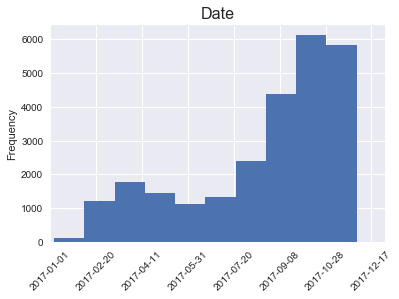

In [7]:
df2017 = user_df[user_df.created_year == 2017]
ax = df2017['created_day_of_year'].plot(kind='hist')
# ax = user_df['age'].plot(kind='hist',bins=range(0,120))

xlabels = [dt.date(2017,1,1) + dt.timedelta(x) for x in range(0,400, 50)]
ax.set_xticklabels(xlabels)

plt.xticks(rotation=45)

ax.set_xlim(0,365)
# ax.set_ylim(0,.008)
# ax.set_ylabel("Relative Density")
ax.set_xlabel("")
plt.title("Date", fontsize=16)
plt.show()

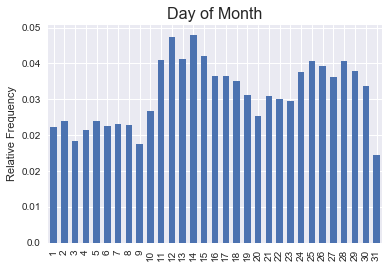

In [8]:
temp = user_df.groupby("created_day_of_month").count().created_date
ax = temp.plot(kind='bar',width=.6)

y_ticks = ax.get_yticks()
ylabels = [round(x/n,2) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Day of Month", fontsize=16)
plt.savefig(website_file_path+"eda_day_of_month.png")
plt.show()

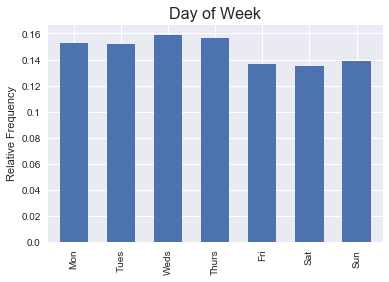

In [9]:
temp = user_df.groupby("created_day_of_week").count().created_date
ax = temp.plot(kind='bar',width=.6)
x_labels = ["Mon","Tues","Weds","Thurs","Fri","Sat","Sun"]
ax.set_xticklabels(x_labels)

y_ticks = ax.get_yticks()

ylabels = [round(x/n,2) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Day of Week", fontsize=16)
# plt.savefig(website_file_path+"eda_day_of_week.png")
plt.show()

In [10]:
ax = user_df['created_hour'].plot(kind='hist',bins=24)
x_labels = ["Midnight", "5 AM", "10 AM", "3 PM","8 PM"]
ax.set_xticklabels(x_labels)
ax.set_xlim(0,23)

y_ticks = ax.get_yticks()


ylabels = [round(x/n,3) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Time of Day", fontsize=16)
plt.savefig(website_file_path+"eda_time_of_day.png")
plt.show()

KeyError: 'created_hour'

In [ ]:
temp = user_df[user_df.has_available == 1]
ax = temp.td_creat_avail.plot(kind='hist',bins=range(-365,365*2))

plt.yscale('log', nonposy='clip')
plt.show()

In [ ]:
temp = user_df[user_df.has_available == 1]
ax = temp.td_creat_avail.plot(kind='hist',bins=range(0,365))

y_ticks = ax.get_yticks()
ylabels = [round(x/n,3) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("Days")

plt.title("Time to Find a Room", fontsize=16)
plt.savefig(website_file_path+"eda_time_to_find_a_room.png")
plt.show()

In [ ]:
print("{} users put an availability in the past.".format
      ((temp.td_creat_avail < 0).sum()))

plt.hist(temp.td_creat_avail, bins=np.arange(-365,-1))
plt.show()

In [ ]:
print("{} users put an availability more than a year in the future.".format
      ((temp.td_creat_avail > 365).sum()))

plt.hist(temp.td_creat_avail, bins=np.arange(365,730))
plt.show()

In [ ]:
binaries = ['has_about',
       'has_amenities', 'has_available', 'has_birthdate', 'has_college',
       'has_email', 'has_facebook', 'has_hometown',
       'has_linkedin', 'has_location', 'has_neighborhoods', 'has_numRoommates',
       'has_password', 'has_picture', 'has_term', 'has_work']
binaries_percent = []
for binary in binaries:
    binaries_percent.append(100*user_df[binary].sum()/n)

In [11]:


percent_df = pd.DataFrame([binaries, binaries_percent]).T
percent_df.columns = ['topic','percent']
# plt.bar(binaries, binaries_percent)
# plt.show()
temp = percent_df.sort_values('percent', ascending=False)

NameError: name 'binaries' is not defined

In [12]:
ax = temp.percent.plot(kind='bar',width=.6)

x_labels = [t[4:] for t in temp.topic]
ax.set_xticklabels(x_labels)
ax.set_ylabel("Percent Responding")
ax.set_xlabel("")

plt.title("Response Rates", fontsize=16)
plt.xticks(rotation=60)
plt.savefig(website_file_path+"eda_percent_responding.png")
plt.show()

AttributeError: 'Series' object has no attribute 'percent'

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
user_df.location = user_df.location.apply(lambda x: x if isinstance(x, list) else [0,0])

In [ ]:
user_loc_df.head()

In [ ]:
city_loc_df.head()

In [ ]:
user_geometry = [Point(xy) for xy in user_df.location]
city_geometry = [Point(xy) for xy in city_df.coordinates]

user_loc_df = user_df.location
city_loc_df = city_df.coordinates
crs = {'init': 'epsg:4326'}
gdf_users = GeoDataFrame(user_loc_df, crs=crs, geometry=user_geometry)
gdf_cities = GeoDataFrame(city_loc_df, crs=crs, geometry=city_geometry)

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))
ax.set_aspect('equal')

# usa
ax.set_xlim([-126, -67])
ax.set_ylim([24, 50])

# bay area ax.set_xlim([-122.8, -121.5]) ax.set_ylim([37, 38.2])
# north east ax.set_xlim([-80, -70]) ax.set_ylim([40, 45])

world.plot(ax=ax, color='#4C72B0', edgecolor='black')
gdf_users.plot(ax=ax, marker='o', color='#CCB974', markersize=10, alpha=.1)
gdf_cities.plot(ax=ax, marker='o', color='#C34F52', markersize=100)
plt.savefig(website_file_path+"eda_location_of_users.png")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
city_dictionary = {'Atlanta': (33.83001385, -84.399949379999995),
 'Boston': (42.329960139999997, -71.070013669999994),
 'Chicago': (41.82999066, -87.750054969999994),
 'Dallas / Fort Worth': (32.820023820000003, -96.840016930000004),
 'Detroit Metro': (42.329960139999997, -83.080055790000003),
 'Fort Lauderdale': (26.136064879999999, -80.141785519999999),
 'Ft Myers / Sw Florida': (26.640297669999999, -81.86049199),
 'Hawaii': (21.30687644, -157.85799790000002),
 'Los Angeles': (33.989978,-118.179980),
 'Minneapolis / St Paul': (44.979979270000001, -93.251786339999995),
 'New York City': (40.749979060000001, -73.980016930000005),
 'Philadelphia': (39.999973160000003, -75.169995970000002),
 'Phoenix': (33.539979879999997, -112.06999170000002),
 'Portland': (45.520024,-122.679990),
 'Sacramento': (38.575021380000003, -121.47003810000001),
 'San Diego': (32.820023820000003, -117.1799899),
 'San Francisco Bay Area': (37.74000775, -122.459978),
 'Seattle-Tacoma': (47.570002049999999, -122.33998500000001),
 'South Florida': (25.787610699999998, -80.224106079999999),
 'Tampa Bay Area': (27.946987929999999, -82.458620850000003),
 'Washington': (38.899549380000003, -77.009418580000002)}

In [ ]:
city_df = pd.DataFrame.from_dict(city_dictionary, orient='index')
city_df['coordinates'] = city_df[[1,0]].values.tolist()

In [ ]:
city_df.coordinates